<a href="https://colab.research.google.com/github/falwa-alkhalifah/Mining-project/blob/main/phase2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/falwa-alkhalifah/Mining-project/refs/heads/main/Dataset/Dataset%20of%20Diabetes%20.csv'

df  = pd.read_csv(url)

Summmry of dataset and statical summaries:

Graphs:

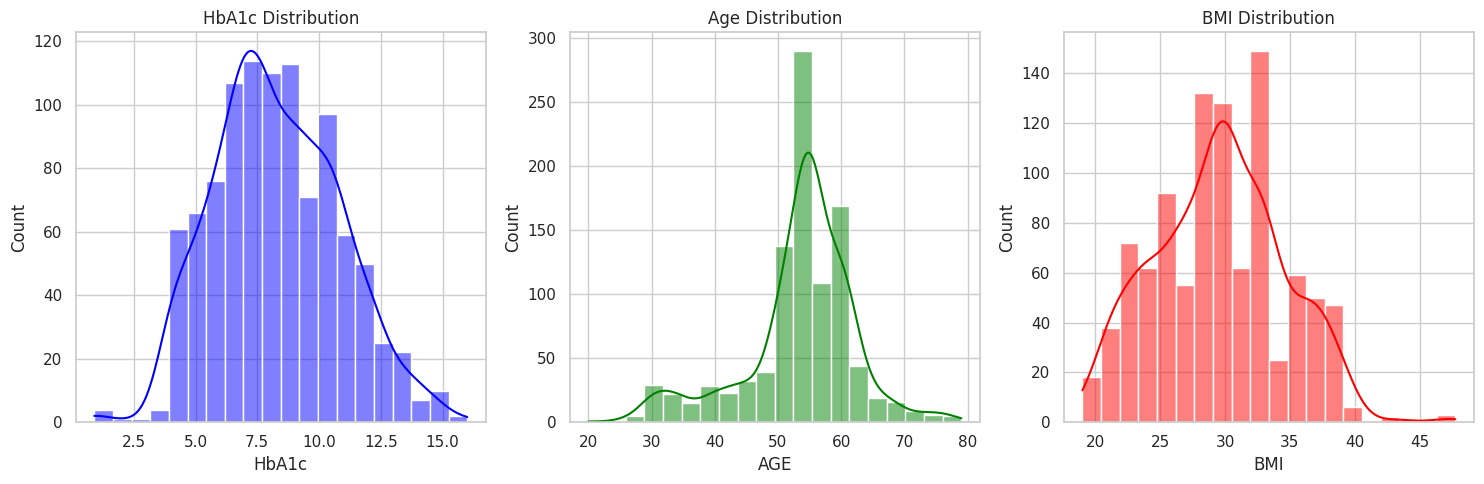

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/falwa-alkhalifah/Mining-project/refs/heads/main/Dataset/Dataset%20of%20Diabetes%20.csv'
df  = pd.read_csv(url)

# Clean the class column (remove spaces)
df['CLASS'] = df['CLASS'].str.strip()

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['HbA1c'], kde=True, color='blue', bins=20)
plt.title('HbA1c Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['AGE'], kde=True, color='green', bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['BMI'], kde=True, color='red', bins=20)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

**Histograms:** the histogram illustrates the distribution for HbA1c, Age and BMI, since hbA1c is a critical diabetes biomarker that reflects the average blood sugar levels over 3 months, age selected to analyze the age demographics and BMI reflects obesity. The histogram indicates that more patients have controlled HbA1c since it is right skewed, most patients are middle-aged and many patients are overweight since the BMI histogram shows a peak.

Correlation Analysis:

Data Cleaning:

Data Transformation:

Features Selection:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['CLASS'] = LabelEncoder().fit_transform(df['CLASS'])

X = df.drop(columns=["CLASS"])
y = df["CLASS"]
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['AGE', 'HbA1c', 'Chol', 'TG', 'BMI']


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()]
print("Selected Features after Variance Threshold:", selected_features.tolist())


Selected Features after Variance Threshold: ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
